## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [11]:
import os
import keras
from keras import optimizers

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = "1"

In [12]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [13]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [14]:
def build_mlp():
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model
model = build_mlp()

In [15]:
model.summary()
opt = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
#optimizer = keras.optimizers.Adam(lr=0.001)
model.compile(optimizer = opt,loss="categorical_crossentropy", metrics=["accuracy"])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_6 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_7 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [16]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 4s 75us/step - loss: 1.8632 - acc: 0.3347 - val_loss: 1.7323 - val_acc: 0.3784
Epoch 2/500
50000/50000 [==============================] - 3s 63us/step - loss: 1.6499 - acc: 0.4136 - val_loss: 1.5888 - val_acc: 0.4372
Epoch 3/500
50000/50000 [==============================] - 3s 65us/step - loss: 1.5556 - acc: 0.4473 - val_loss: 1.5256 - val_acc: 0.4593
Epoch 4/500
50000/50000 [==============================] - 3s 67us/step - loss: 1.4920 - acc: 0.4701 - val_loss: 1.5538 - val_acc: 0.4481
Epoch 5/500
50000/50000 [==============================] - 3s 65us/step - loss: 1.4404 - acc: 0.4903 - val_loss: 1.4711 - val_acc: 0.4776
Epoch 6/500
50000/50000 [==============================] - 3s 66us/step - loss: 1.4019 - acc: 0.5031 - val_loss: 1.4529 - val_acc: 0.4859
Epoch 7/500
50000/50000 [==============================] - 3s 64us/step - loss: 1.3659 - acc: 0.5151 - val_loss: 1.4412 - 

50000/50000 [==============================] - 3s 65us/step - loss: 0.3042 - acc: 0.8939 - val_loss: 2.1931 - val_acc: 0.5298
Epoch 60/500
50000/50000 [==============================] - 3s 65us/step - loss: 0.3014 - acc: 0.8943 - val_loss: 2.5898 - val_acc: 0.4927
Epoch 61/500
50000/50000 [==============================] - 3s 65us/step - loss: 0.3062 - acc: 0.8900 - val_loss: 2.3236 - val_acc: 0.5220
Epoch 62/500
50000/50000 [==============================] - 3s 65us/step - loss: 0.2814 - acc: 0.9007 - val_loss: 2.3608 - val_acc: 0.5172
Epoch 63/500
50000/50000 [==============================] - 3s 64us/step - loss: 0.2735 - acc: 0.9035 - val_loss: 2.3616 - val_acc: 0.5227
Epoch 64/500
50000/50000 [==============================] - 3s 65us/step - loss: 0.2450 - acc: 0.9131 - val_loss: 2.4813 - val_acc: 0.5311
Epoch 65/500
50000/50000 [==============================] - 3s 65us/step - loss: 0.2483 - acc: 0.9137 - val_loss: 2.4965 - val_acc: 0.5198
Epoch 66/500
50000/50000 [==============

Epoch 118/500
50000/50000 [==============================] - 3s 65us/step - loss: 0.0953 - acc: 0.9672 - val_loss: 3.6352 - val_acc: 0.5208
Epoch 119/500
50000/50000 [==============================] - 3s 65us/step - loss: 0.1136 - acc: 0.9600 - val_loss: 3.5786 - val_acc: 0.5239
Epoch 120/500
50000/50000 [==============================] - 3s 65us/step - loss: 0.0843 - acc: 0.9706 - val_loss: 3.6101 - val_acc: 0.5265
Epoch 121/500
50000/50000 [==============================] - 3s 65us/step - loss: 0.0795 - acc: 0.9724 - val_loss: 3.6751 - val_acc: 0.5255
Epoch 122/500
50000/50000 [==============================] - 3s 65us/step - loss: 0.0781 - acc: 0.9719 - val_loss: 3.5099 - val_acc: 0.5310
Epoch 123/500
50000/50000 [==============================] - 3s 65us/step - loss: 0.0642 - acc: 0.9784 - val_loss: 3.5738 - val_acc: 0.5270
Epoch 124/500
50000/50000 [==============================] - 3s 64us/step - loss: 0.0729 - acc: 0.9748 - val_loss: 3.8102 - val_acc: 0.5114
Epoch 125/500
50000/

50000/50000 [==============================] - 3s 65us/step - loss: 0.0014 - acc: 0.9999 - val_loss: 4.0745 - val_acc: 0.5471
Epoch 177/500
50000/50000 [==============================] - 3s 65us/step - loss: 7.5432e-04 - acc: 1.0000 - val_loss: 4.0801 - val_acc: 0.5482
Epoch 178/500
50000/50000 [==============================] - 3s 65us/step - loss: 4.6658e-04 - acc: 1.0000 - val_loss: 4.0870 - val_acc: 0.5479
Epoch 179/500
50000/50000 [==============================] - 3s 65us/step - loss: 5.0377e-04 - acc: 1.0000 - val_loss: 4.1066 - val_acc: 0.5482
Epoch 180/500
50000/50000 [==============================] - 3s 65us/step - loss: 4.5818e-04 - acc: 1.0000 - val_loss: 4.1065 - val_acc: 0.5488
Epoch 181/500
50000/50000 [==============================] - 3s 65us/step - loss: 3.9320e-04 - acc: 1.0000 - val_loss: 4.1108 - val_acc: 0.5479
Epoch 182/500
50000/50000 [==============================] - 3s 65us/step - loss: 3.9008e-04 - acc: 1.0000 - val_loss: 4.1297 - val_acc: 0.5473
Epoch 183/

50000/50000 [==============================] - 3s 65us/step - loss: 1.5870e-04 - acc: 1.0000 - val_loss: 4.2289 - val_acc: 0.5502
Epoch 234/500
50000/50000 [==============================] - 3s 64us/step - loss: 1.5635e-04 - acc: 1.0000 - val_loss: 4.2316 - val_acc: 0.5506
Epoch 235/500
50000/50000 [==============================] - 3s 66us/step - loss: 1.5518e-04 - acc: 1.0000 - val_loss: 4.2328 - val_acc: 0.5500
Epoch 236/500
50000/50000 [==============================] - 3s 65us/step - loss: 1.5352e-04 - acc: 1.0000 - val_loss: 4.2338 - val_acc: 0.5501
Epoch 237/500
50000/50000 [==============================] - 3s 65us/step - loss: 1.5279e-04 - acc: 1.0000 - val_loss: 4.2359 - val_acc: 0.5502
Epoch 238/500
50000/50000 [==============================] - 3s 65us/step - loss: 1.4975e-04 - acc: 1.0000 - val_loss: 4.2368 - val_acc: 0.5496
Epoch 239/500
50000/50000 [==============================] - 3s 64us/step - loss: 1.4936e-04 - acc: 1.0000 - val_loss: 4.2382 - val_acc: 0.5498
Epoch 

Epoch 290/500
50000/50000 [==============================] - 3s 65us/step - loss: 1.0669e-04 - acc: 1.0000 - val_loss: 4.2850 - val_acc: 0.5512
Epoch 291/500
50000/50000 [==============================] - 3s 65us/step - loss: 1.0595e-04 - acc: 1.0000 - val_loss: 4.2859 - val_acc: 0.5515
Epoch 292/500
50000/50000 [==============================] - 3s 65us/step - loss: 1.0577e-04 - acc: 1.0000 - val_loss: 4.2864 - val_acc: 0.5521
Epoch 293/500
50000/50000 [==============================] - 3s 65us/step - loss: 1.0459e-04 - acc: 1.0000 - val_loss: 4.2865 - val_acc: 0.5506
Epoch 294/500
50000/50000 [==============================] - 3s 65us/step - loss: 1.0476e-04 - acc: 1.0000 - val_loss: 4.2874 - val_acc: 0.5513
Epoch 295/500
50000/50000 [==============================] - 3s 65us/step - loss: 1.0366e-04 - acc: 1.0000 - val_loss: 4.2883 - val_acc: 0.5511
Epoch 296/500
50000/50000 [==============================] - 3s 65us/step - loss: 1.0314e-04 - acc: 1.0000 - val_loss: 4.2898 - val_acc:

Epoch 347/500
50000/50000 [==============================] - 3s 64us/step - loss: 8.2363e-05 - acc: 1.0000 - val_loss: 4.3214 - val_acc: 0.5504
Epoch 348/500
50000/50000 [==============================] - 3s 66us/step - loss: 8.2188e-05 - acc: 1.0000 - val_loss: 4.3224 - val_acc: 0.5508
Epoch 349/500
50000/50000 [==============================] - 3s 64us/step - loss: 8.1732e-05 - acc: 1.0000 - val_loss: 4.3225 - val_acc: 0.5514
Epoch 350/500
50000/50000 [==============================] - 3s 66us/step - loss: 8.1377e-05 - acc: 1.0000 - val_loss: 4.3233 - val_acc: 0.5511
Epoch 351/500
50000/50000 [==============================] - 3s 65us/step - loss: 8.1274e-05 - acc: 1.0000 - val_loss: 4.3235 - val_acc: 0.5511
Epoch 352/500
50000/50000 [==============================] - 3s 66us/step - loss: 8.1009e-05 - acc: 1.0000 - val_loss: 4.3246 - val_acc: 0.5508
Epoch 353/500
50000/50000 [==============================] - 3s 64us/step - loss: 8.0278e-05 - acc: 1.0000 - val_loss: 4.3249 - val_acc:

Epoch 404/500
50000/50000 [==============================] - 3s 66us/step - loss: 6.7830e-05 - acc: 1.0000 - val_loss: 4.3487 - val_acc: 0.5511
Epoch 405/500
50000/50000 [==============================] - 3s 67us/step - loss: 6.7629e-05 - acc: 1.0000 - val_loss: 4.3495 - val_acc: 0.5514
Epoch 406/500
50000/50000 [==============================] - 3s 65us/step - loss: 6.7283e-05 - acc: 1.0000 - val_loss: 4.3501 - val_acc: 0.5516
Epoch 407/500
50000/50000 [==============================] - 3s 66us/step - loss: 6.7304e-05 - acc: 1.0000 - val_loss: 4.3505 - val_acc: 0.5515
Epoch 408/500
50000/50000 [==============================] - 3s 65us/step - loss: 6.7132e-05 - acc: 1.0000 - val_loss: 4.3509 - val_acc: 0.5512
Epoch 409/500
50000/50000 [==============================] - 3s 64us/step - loss: 6.6791e-05 - acc: 1.0000 - val_loss: 4.3520 - val_acc: 0.5515
Epoch 410/500
50000/50000 [==============================] - 3s 66us/step - loss: 6.6473e-05 - acc: 1.0000 - val_loss: 4.3520 - val_acc:

Epoch 461/500
50000/50000 [==============================] - 3s 65us/step - loss: 5.7659e-05 - acc: 1.0000 - val_loss: 4.3721 - val_acc: 0.5522
Epoch 462/500
50000/50000 [==============================] - 3s 65us/step - loss: 5.7828e-05 - acc: 1.0000 - val_loss: 4.3723 - val_acc: 0.5516
Epoch 463/500
50000/50000 [==============================] - 3s 65us/step - loss: 5.7585e-05 - acc: 1.0000 - val_loss: 4.3724 - val_acc: 0.5510
Epoch 464/500
50000/50000 [==============================] - 3s 65us/step - loss: 5.7610e-05 - acc: 1.0000 - val_loss: 4.3728 - val_acc: 0.5521
Epoch 465/500
50000/50000 [==============================] - 3s 67us/step - loss: 5.7267e-05 - acc: 1.0000 - val_loss: 4.3739 - val_acc: 0.5515
Epoch 466/500
50000/50000 [==============================] - 3s 65us/step - loss: 5.7141e-05 - acc: 1.0000 - val_loss: 4.3735 - val_acc: 0.5514
Epoch 467/500
50000/50000 [==============================] - 3s 66us/step - loss: 5.7066e-05 - acc: 1.0000 - val_loss: 4.3734 - val_acc:

In [17]:
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 3s 65us/step - loss: 5.2571e-05 - acc: 1.0000 - val_loss: 4.3848 - val_acc: 0.5511
Epoch 2/500
50000/50000 [==============================] - 3s 66us/step - loss: 5.2450e-05 - acc: 1.0000 - val_loss: 4.3860 - val_acc: 0.5512
Epoch 3/500
50000/50000 [==============================] - 3s 65us/step - loss: 5.2322e-05 - acc: 1.0000 - val_loss: 4.3857 - val_acc: 0.5508
Epoch 4/500
50000/50000 [==============================] - 3s 65us/step - loss: 5.2384e-05 - acc: 1.0000 - val_loss: 4.3865 - val_acc: 0.5517
Epoch 5/500
50000/50000 [==============================] - 3s 65us/step - loss: 5.2141e-05 - acc: 1.0000 - val_loss: 4.3867 - val_acc: 0.5521
Epoch 6/500
50000/50000 [==============================] - 3s 66us/step - loss: 5.2017e-05 - acc: 1.0000 - val_loss: 4.3865 - val_acc: 0.5511
Epoch 7/500
50000/50000 [==============================] - 3s 65us/step - loss: 5.1954e-05 - acc: 

50000/50000 [==============================] - 3s 70us/step - loss: 4.6618e-05 - acc: 1.0000 - val_loss: 4.4024 - val_acc: 0.5510
Epoch 59/500
50000/50000 [==============================] - 3s 69us/step - loss: 4.6551e-05 - acc: 1.0000 - val_loss: 4.4031 - val_acc: 0.5515
Epoch 60/500
50000/50000 [==============================] - 3s 67us/step - loss: 4.6414e-05 - acc: 1.0000 - val_loss: 4.4035 - val_acc: 0.5519
Epoch 61/500
50000/50000 [==============================] - 3s 69us/step - loss: 4.6377e-05 - acc: 1.0000 - val_loss: 4.4038 - val_acc: 0.5514
Epoch 62/500
50000/50000 [==============================] - 3s 69us/step - loss: 4.6396e-05 - acc: 1.0000 - val_loss: 4.4043 - val_acc: 0.5522
Epoch 63/500
50000/50000 [==============================] - 3s 68us/step - loss: 4.6155e-05 - acc: 1.0000 - val_loss: 4.4043 - val_acc: 0.5512
Epoch 64/500
50000/50000 [==============================] - 3s 69us/step - loss: 4.6135e-05 - acc: 1.0000 - val_loss: 4.4046 - val_acc: 0.5514
Epoch 65/500

50000/50000 [==============================] - 3s 68us/step - loss: 4.2062e-05 - acc: 1.0000 - val_loss: 4.4181 - val_acc: 0.5506
Epoch 116/500
50000/50000 [==============================] - 4s 70us/step - loss: 4.1899e-05 - acc: 1.0000 - val_loss: 4.4186 - val_acc: 0.5510
Epoch 117/500
50000/50000 [==============================] - 4s 77us/step - loss: 4.1865e-05 - acc: 1.0000 - val_loss: 4.4188 - val_acc: 0.5510
Epoch 118/500
50000/50000 [==============================] - 4s 73us/step - loss: 4.1818e-05 - acc: 1.0000 - val_loss: 4.4190 - val_acc: 0.5510
Epoch 119/500
50000/50000 [==============================] - 4s 73us/step - loss: 4.1761e-05 - acc: 1.0000 - val_loss: 4.4195 - val_acc: 0.5504
Epoch 120/500
50000/50000 [==============================] - 4s 76us/step - loss: 4.1642e-05 - acc: 1.0000 - val_loss: 4.4195 - val_acc: 0.5506
Epoch 121/500
50000/50000 [==============================] - 4s 71us/step - loss: 4.1547e-05 - acc: 1.0000 - val_loss: 4.4196 - val_acc: 0.5502
Epoch 

Epoch 172/500
50000/50000 [==============================] - 3s 69us/step - loss: 3.8246e-05 - acc: 1.0000 - val_loss: 4.4313 - val_acc: 0.5508
Epoch 173/500
50000/50000 [==============================] - 4s 73us/step - loss: 3.8178e-05 - acc: 1.0000 - val_loss: 4.4315 - val_acc: 0.5507
Epoch 174/500
50000/50000 [==============================] - 3s 65us/step - loss: 3.8124e-05 - acc: 1.0000 - val_loss: 4.4319 - val_acc: 0.5500
Epoch 175/500
50000/50000 [==============================] - 3s 66us/step - loss: 3.8087e-05 - acc: 1.0000 - val_loss: 4.4321 - val_acc: 0.5503
Epoch 176/500
50000/50000 [==============================] - 3s 67us/step - loss: 3.7968e-05 - acc: 1.0000 - val_loss: 4.4321 - val_acc: 0.5507
Epoch 177/500
50000/50000 [==============================] - 4s 71us/step - loss: 3.7941e-05 - acc: 1.0000 - val_loss: 4.4325 - val_acc: 0.5507
Epoch 178/500
50000/50000 [==============================] - 4s 79us/step - loss: 3.7854e-05 - acc: 1.0000 - val_loss: 4.4328 - val_acc:

Epoch 229/500
50000/50000 [==============================] - 4s 78us/step - loss: 3.5126e-05 - acc: 1.0000 - val_loss: 4.4436 - val_acc: 0.5505
Epoch 230/500
50000/50000 [==============================] - 4s 73us/step - loss: 3.5059e-05 - acc: 1.0000 - val_loss: 4.4436 - val_acc: 0.5500
Epoch 231/500
50000/50000 [==============================] - 4s 72us/step - loss: 3.5023e-05 - acc: 1.0000 - val_loss: 4.4436 - val_acc: 0.5500
Epoch 232/500
50000/50000 [==============================] - 4s 72us/step - loss: 3.4952e-05 - acc: 1.0000 - val_loss: 4.4439 - val_acc: 0.5501
Epoch 233/500
50000/50000 [==============================] - 3s 70us/step - loss: 3.4945e-05 - acc: 1.0000 - val_loss: 4.4441 - val_acc: 0.5500
Epoch 234/500
50000/50000 [==============================] - 3s 70us/step - loss: 3.4861e-05 - acc: 1.0000 - val_loss: 4.4444 - val_acc: 0.5499
Epoch 235/500
50000/50000 [==============================] - 4s 77us/step - loss: 3.4784e-05 - acc: 1.0000 - val_loss: 4.4442 - val_acc:

Epoch 286/500
50000/50000 [==============================] - 3s 68us/step - loss: 3.2532e-05 - acc: 1.0000 - val_loss: 4.4541 - val_acc: 0.5498
Epoch 287/500
50000/50000 [==============================] - 3s 67us/step - loss: 3.2499e-05 - acc: 1.0000 - val_loss: 4.4547 - val_acc: 0.5502
Epoch 288/500
50000/50000 [==============================] - 3s 68us/step - loss: 3.2471e-05 - acc: 1.0000 - val_loss: 4.4548 - val_acc: 0.5501
Epoch 289/500
50000/50000 [==============================] - 3s 66us/step - loss: 3.2398e-05 - acc: 1.0000 - val_loss: 4.4552 - val_acc: 0.5496
Epoch 290/500
50000/50000 [==============================] - 3s 67us/step - loss: 3.2386e-05 - acc: 1.0000 - val_loss: 4.4552 - val_acc: 0.5502
Epoch 291/500
50000/50000 [==============================] - 3s 68us/step - loss: 3.2347e-05 - acc: 1.0000 - val_loss: 4.4554 - val_acc: 0.5504
Epoch 292/500
50000/50000 [==============================] - 3s 66us/step - loss: 3.2302e-05 - acc: 1.0000 - val_loss: 4.4558 - val_acc:

Epoch 343/500
50000/50000 [==============================] - 3s 69us/step - loss: 3.0356e-05 - acc: 1.0000 - val_loss: 4.4646 - val_acc: 0.5502
Epoch 344/500
50000/50000 [==============================] - 3s 66us/step - loss: 3.0242e-05 - acc: 1.0000 - val_loss: 4.4649 - val_acc: 0.5510
Epoch 345/500
50000/50000 [==============================] - 3s 66us/step - loss: 3.0261e-05 - acc: 1.0000 - val_loss: 4.4645 - val_acc: 0.5499
Epoch 346/500
50000/50000 [==============================] - 3s 66us/step - loss: 3.0225e-05 - acc: 1.0000 - val_loss: 4.4652 - val_acc: 0.5503
Epoch 347/500
50000/50000 [==============================] - 3s 66us/step - loss: 3.0175e-05 - acc: 1.0000 - val_loss: 4.4652 - val_acc: 0.5499
Epoch 348/500
50000/50000 [==============================] - 3s 68us/step - loss: 3.0146e-05 - acc: 1.0000 - val_loss: 4.4654 - val_acc: 0.5499
Epoch 349/500
50000/50000 [==============================] - 3s 67us/step - loss: 3.0098e-05 - acc: 1.0000 - val_loss: 4.4653 - val_acc:

Epoch 400/500
50000/50000 [==============================] - 3s 66us/step - loss: 2.8413e-05 - acc: 1.0000 - val_loss: 4.4736 - val_acc: 0.5504
Epoch 401/500
50000/50000 [==============================] - 3s 67us/step - loss: 2.8380e-05 - acc: 1.0000 - val_loss: 4.4740 - val_acc: 0.5501
Epoch 402/500
50000/50000 [==============================] - 3s 66us/step - loss: 2.8340e-05 - acc: 1.0000 - val_loss: 4.4742 - val_acc: 0.5505
Epoch 403/500
50000/50000 [==============================] - 3s 67us/step - loss: 2.8320e-05 - acc: 1.0000 - val_loss: 4.4741 - val_acc: 0.5501
Epoch 404/500
50000/50000 [==============================] - 3s 66us/step - loss: 2.8279e-05 - acc: 1.0000 - val_loss: 4.4744 - val_acc: 0.5503
Epoch 405/500
50000/50000 [==============================] - 3s 67us/step - loss: 2.8234e-05 - acc: 1.0000 - val_loss: 4.4743 - val_acc: 0.5504
Epoch 406/500
50000/50000 [==============================] - 3s 66us/step - loss: 2.8210e-05 - acc: 1.0000 - val_loss: 4.4749 - val_acc:

Epoch 457/500
50000/50000 [==============================] - 3s 65us/step - loss: 2.6743e-05 - acc: 1.0000 - val_loss: 4.4823 - val_acc: 0.5501
Epoch 458/500
50000/50000 [==============================] - 3s 66us/step - loss: 2.6710e-05 - acc: 1.0000 - val_loss: 4.4825 - val_acc: 0.5498
Epoch 459/500
50000/50000 [==============================] - 3s 66us/step - loss: 2.6677e-05 - acc: 1.0000 - val_loss: 4.4825 - val_acc: 0.5503
Epoch 460/500
50000/50000 [==============================] - 3s 67us/step - loss: 2.6662e-05 - acc: 1.0000 - val_loss: 4.4828 - val_acc: 0.5502
Epoch 461/500
50000/50000 [==============================] - 3s 66us/step - loss: 2.6624e-05 - acc: 1.0000 - val_loss: 4.4828 - val_acc: 0.5499
Epoch 462/500
50000/50000 [==============================] - 3s 66us/step - loss: 2.6611e-05 - acc: 1.0000 - val_loss: 4.4829 - val_acc: 0.5502
Epoch 463/500
50000/50000 [==============================] - 3s 67us/step - loss: 2.6553e-05 - acc: 1.0000 - val_loss: 4.4833 - val_acc:

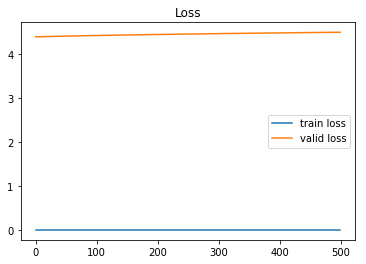

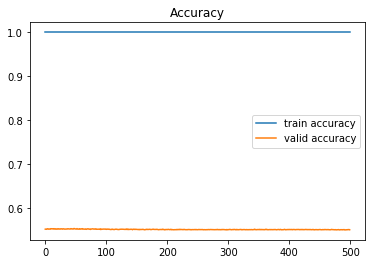

In [18]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()